# Model Representation I

Let's examine how we will represent a hypothesis function using neural networks. At a very simple level, neurons are basically computational units that take inputs (dendrites) as electrical inputs (called "spikes") that are channeled to outputs (axons). In our model, our dendrites are like the input features x_1\cdots x_nx 
1
​
 ⋯x 
n
​
 , and the output is the result of our hypothesis function. In this model our x_0x 
0
​
  input node is sometimes called the "bias unit." It is always equal to 1. In neural networks, we use the same logistic function as in classification, \frac{1}{1 + e^{-\theta^Tx}} 
1+e 
−θ 
T
 x
 
1
​
 , yet we sometimes call it a sigmoid (logistic) activation function. In this situation, our "theta" parameters are sometimes called "weights".

Visually, a simplistic representation looks like:

$ [x_0 x_1 x_2] \rightarrow [$  $] \rightarrow h_\theta(x)$

Our input nodes (layer 1), also known as the "input layer", go into another node (layer 2), which finally outputs the hypothesis function, known as the "output layer".

We can have intermediate layers of nodes between the input and output layers called the "hidden layers."

In this example, we label these intermediate or "hidden" layer nodes $a_0^2 ... a_n^2$
  and call them "activation units."

$\begin{align*}& a_i^{(j)} = \text{"activation" of unit $i$ in layer $j$} \newline& 
\Theta^{(j)} = \text{matrix of weights controlling function mapping from layer $j$ to layer $j+1$}\end{align*}$

If we had one hidden layer, it would look like:

$ [x_0 x_1 x_2 x_3] \rightarrow [ a_1^2 a_2^2 a_3^2 ] \rightarrow h_\theta(x)$

The values for each of the "activation" nodes is obtained as follows:

$\begin{align*} a_1^{(2)} = g(\Theta_{10}^{(1)}x_0 + \Theta_{11}^{(1)}x_1 + \Theta_{12}^{(1)}x_2 + \Theta_{13}^{(1)}x_3) \newline a_2^{(2)} = g(\Theta_{20}^{(1)}x_0 + \Theta_{21}^{(1)}x_1 + \Theta_{22}^{(1)}x_2 + \Theta_{23}^{(1)}x_3) \newline a_3^{(2)} = g(\Theta_{30}^{(1)}x_0 + \Theta_{31}^{(1)}x_1 + \Theta_{32}^{(1)}x_2 + \Theta_{33}^{(1)}x_3) \newline h_\Theta(x) = a_1^{(3)} = g(\Theta_{10}^{(2)}a_0^{(2)} + \Theta_{11}^{(2)}a_1^{(2)} + \Theta_{12}^{(2)}a_2^{(2)} + \Theta_{13}^{(2)}a_3^{(2)}) \newline \end{align*}$

This is saying that we compute our activation nodes by using a 3×4 matrix of parameters. We apply each row of the parameters to our inputs to obtain the value for one activation node. Our hypothesis output is the logistic function applied to the sum of the values of our activation nodes, which have been multiplied by yet another parameter matrix \Theta^{(2)}Θ 
(2)
  containing the weights for our second layer of nodes.

Each layer gets its own matrix of weights, \Theta^{(j)}Θ 
(j)
 .

The dimensions of these matrices of weights is determined as follows:

\text{If network has $s_j$ units in layer $j$ and $s_{j+1}$ units in layer $j+1$, then $\Theta^{(j)}$ will be of dimension $s_{j+1} \times (s_j + 1)$.}If network has s 
j
​
  units in layer j and s 
j+1
​
  units in layer j+1, then Θ 
(j)
  will be of dimension s 
j+1
​
 ×(s 
j
​
 +1).

The +1 comes from the addition in \Theta^{(j)}Θ 
(j)
  of the "bias nodes," x_0x 
0
​
  and \Theta_0^{(j)}Θ 
0
(j)
​
 . In other words the output nodes will not include the bias nodes while the inputs will. The following image summarizes our model representation: 

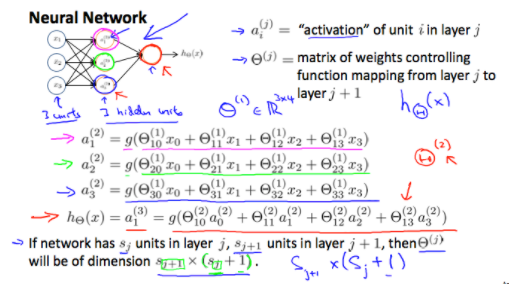

Example: If layer 1 has 2 input nodes and layer 2 has 4 activation nodes. Dimension of $\Theta^{(i)}$  is going to be 4×3 where $s_j = 2$ and $s_{j+1} = 4 , \text{so } s_{j+1} * (s_j + 1) = 4 * 3$

# Model Representation II

To re-iterate, the following is an example of a neural network:

$\begin{align*} a_1^{(2)} = g(\Theta_{10}^{(1)}x_0 + \Theta_{11}^{(1)}x_1 + \Theta_{12}^{(1)}x_2 + \Theta_{13}^{(1)}x_3) \newline a_2^{(2)} = g(\Theta_{20}^{(1)}x_0 + \Theta_{21}^{(1)}x_1 + \Theta_{22}^{(1)}x_2 + \Theta_{23}^{(1)}x_3) \newline a_3^{(2)} = g(\Theta_{30}^{(1)}x_0 + \Theta_{31}^{(1)}x_1 + \Theta_{32}^{(1)}x_2 + \Theta_{33}^{(1)}x_3) \newline h_\Theta(x) = a_1^{(3)} = g(\Theta_{10}^{(2)}a_0^{(2)} + \Theta_{11}^{(2)}a_1^{(2)} + \Theta_{12}^{(2)}a_2^{(2)} + \Theta_{13}^{(2)}a_3^{(2)}) \newline \end{align*} $

In this section we'll do a vectorized implementation of the above functions. We're going to define a new variable z_k^{(j)}z 
k
(j)
​
  that encompasses the parameters inside our g function. In our previous example if we replaced by the variable z for all the parameters we would get:

$\begin{align*}a_1^{(2)} = g(z_1^{(2)}) \newline a_2^{(2)} = g(z_2^{(2)}) \newline a_3^{(2)} = g(z_3^{(2)}) \newline \end{align*}$

In other words, for layer j=2 and node k, the variable z will be:

$z_k^{(2)} = \Theta_{k,0}^{(1)}x_0 + \Theta_{k,1}^{(1)}x_1 + ... + \Theta_{k,n}^{(1)}x_n $

The vector representation of x and $z^{j}$ is:


$\begin{align*}x = \begin{bmatrix}x_0 \newline x_1 \newline\cdots \newline x_n\end{bmatrix} &z^{(j)} = \begin{bmatrix}z_1^{(j)} \newline z_2^{(j)} \newline\cdots \newline z_n^{(j)}\end{bmatrix}\end{align*}$

Setting $x = a^{(1)}$, we can rewrite the equation as:
    
$z^{(j)} = \Theta^{(j-1)}a^{(j-1)}$


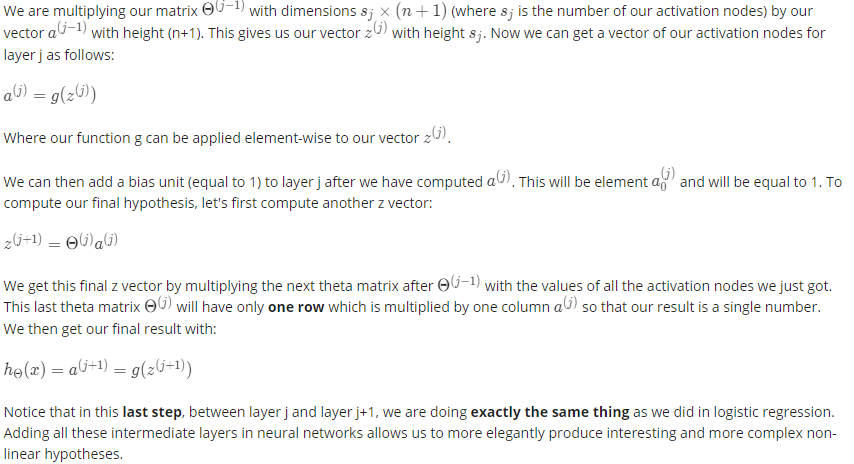

# Examples and Intuitions I

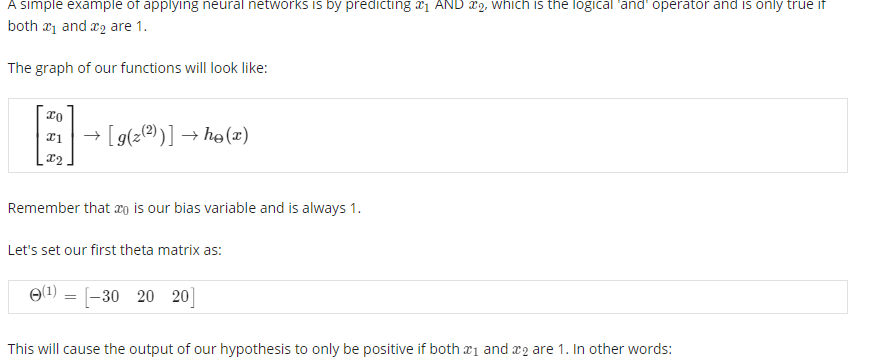

$\begin{align*}& h_\Theta(x) = g(-30 + 20x_1 + 20x_2) \newline \newline & x_1 = 0 \ \ and \ \ x_2 = 0 \ \ then \ \ g(-30) \approx 0 \newline & x_1 = 0 \ \ and \ \ x_2 = 1 \ \ then \ \ g(-10) \approx 0 \newline & x_1 = 1 \ \ and \ \ x_2 = 0 \ \ then \ \ g(-10) \approx 0 \newline & x_1 = 1 \ \ and \ \ x_2 = 1 \ \ then \ \ g(10) \approx 1\end{align*}$

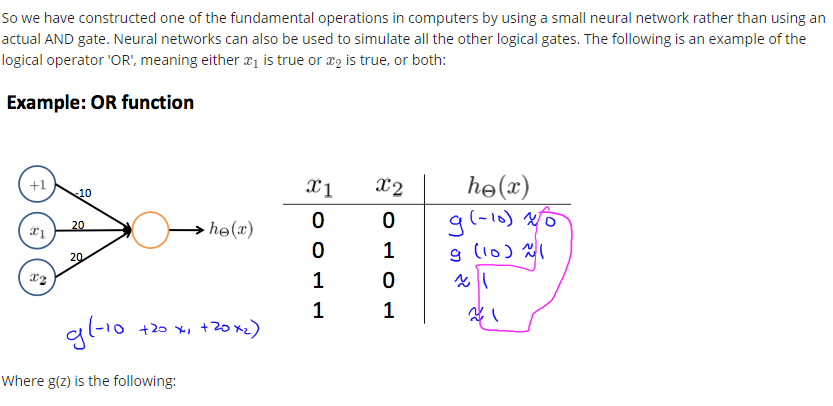

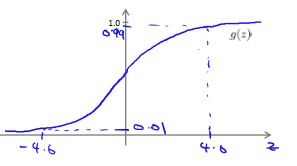

# Examples and Intuitions II

The $Θ^{(1)}$
  matrices for AND, NOR, and OR are:

$\begin{align*}AND:\newline\Theta^{(1)} &=\begin{bmatrix}-30 & 20 & 20\end{bmatrix} \newline NOR:\newline\Theta^{(1)} &= \begin{bmatrix}10 & -20 & -20\end{bmatrix} \newline OR:\newline\Theta^{(1)} &= \begin{bmatrix}-10 & 20 & 20\end{bmatrix} \newline\end{align*}$

We can combine these to get the XNOR logical operator (which gives 1 if $x_1$
  and $x_2$
  are both 0 or both 1).
  
 $\begin{align*}\begin{bmatrix}x_0 \newline x_1 \newline x_2\end{bmatrix} \rightarrow\begin{bmatrix}a_1^{(2)} \newline a_2^{(2)} \end{bmatrix} \rightarrow\begin{bmatrix}a^{(3)}\end{bmatrix} \rightarrow h_\Theta(x)\end{align*}$

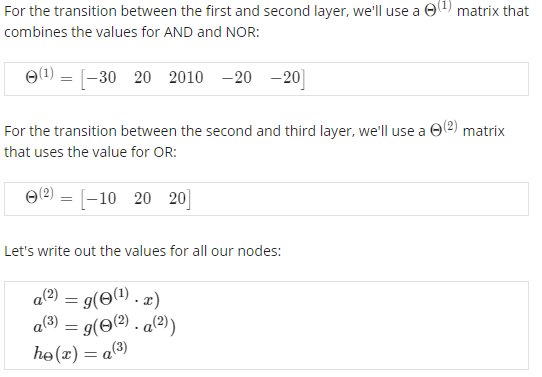

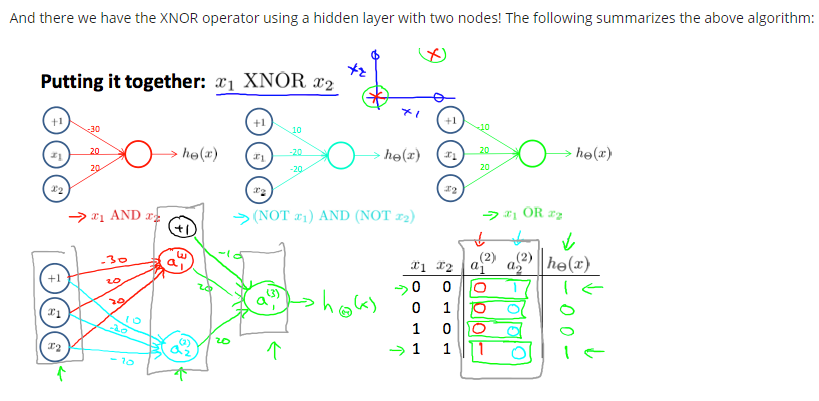

# Multiclass Classification

To classify data into multiple classes, we let our hypothesis function return a vector of values. Say we wanted to classify our data into one of four categories. We will use the following example to see how this classification is done. This algorithm takes as input an image and classifies it accordingly: 

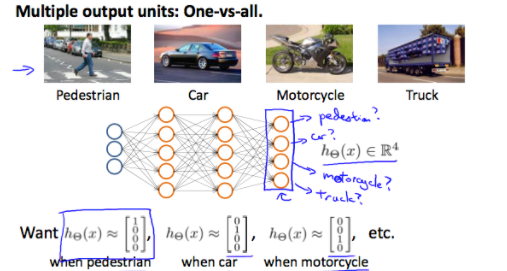

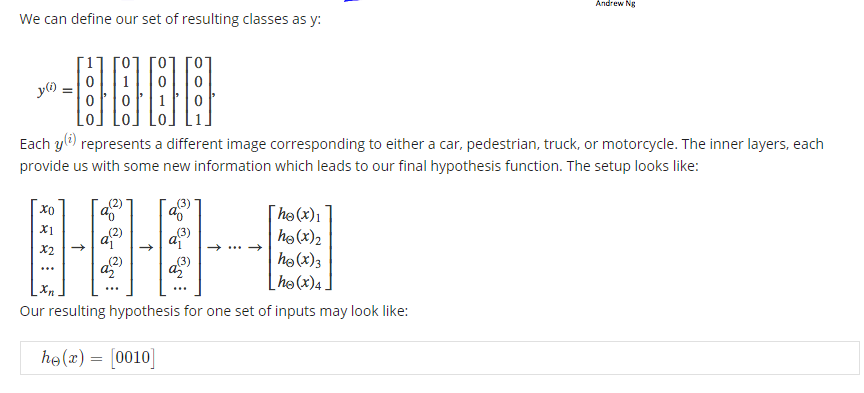

In which case our resulting class is the third one down, or $h_\Theta(x)_3$ , which represents the motorcycle. 